In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import laspy
import os

from sklearn.base import BaseEstimator, ClusterMixin
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.utils.validation import check_is_fitted, check_array
from sklearn.metrics.pairwise import pairwise_distances

In [76]:
class CustomClustering(BaseEstimator, ClusterMixin): # Step 1: Create a template for custom clustering algorithms
    """
    A custom clustering algorithm that clusters data using a median-based
    approach, similar to k-means but using medians as cluster centers.
    """
    def __init__(self, n_clusters=2, max_iter=100, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol

    def fit(self, X, y=None):
        X = check_array(X)
        n_samples, n_features = X.shape

        # Randomly initialize cluster centers from the data points
        rng = np.random.default_rng()
        initial_idx = rng.choice(n_samples, self.n_clusters, replace=False)
        self.cluster_centers_ = X[initial_idx]

        for i in range(self.max_iter):
            distances = pairwise_distances(X, self.cluster_centers_, metric="manhattan")
            labels = np.argmin(distances, axis=1)
            new_centers = np.array([
                np.median(X[labels == k], axis=0) if np.any(labels == k) else self.cluster_centers_[k]
                for k in range(self.n_clusters)
            ])
            if np.all(np.abs(new_centers - self.cluster_centers_) < self.tol):
                break
            self.cluster_centers_ = new_centers

        self.labels_ = labels
        return self

    def predict(self, X):
        check_is_fitted(self, 'cluster_centers_')
        distances = pairwise_distances(X, self.cluster_centers_, metric="manhattan")
        return np.argmin(distances, axis=1)

    def fit_predict(self, X, y=None):
        self.fit(X)
        return self.labels_

In [77]:
class NestedClustering:
    def __init__(self, clustering_stages):
        self.clustering_stages = clustering_stages

    def fit(self, X, y=None):
        
        self.stage_labels = []  # Store labels for each stage
        self.final_labels = np.zeros(X.shape[0], dtype=int)  # Final labels
        cluster_offset = 0  # Offset to ensure unique labels across clusters
        current_data = X  # Current data to process
        current_labels = np.zeros(X.shape[0], dtype=int)  # Initialize labels

        for stage_idx, stage in enumerate(self.clustering_stages):
            new_labels = np.zeros_like(current_labels)  # New labels for this stage
            unique_clusters = np.unique(current_labels)  # Unique clusters in current stage

            for cluster_id in unique_clusters:
                # Get data points for the current cluster
                cluster_data = current_data[current_labels == cluster_id]
                if len(cluster_data) == 0:  # Skip empty clusters
                    continue
                
                # Fit the clustering algorithm to the current cluster
                stage.fit(cluster_data)
                cluster_stage_labels = stage.labels_

                # Assign new labels offset by cluster_offset
                new_labels[current_labels == cluster_id] = (
                    cluster_stage_labels + cluster_offset
                )

                # Update cluster offset for the next unique label
                cluster_offset += len(np.unique(cluster_stage_labels))
            
            # Store the stage labels and update current labels
            self.stage_labels.append(new_labels.copy())
            current_labels = new_labels
            current_data = X  # Keep the original data for clustering
            

        # Reindex final labels to start from zero
        unique_labels = np.unique(current_labels)
        reindex_map = {old_label: new_label for new_label, old_label in enumerate(unique_labels)}
        self.final_labels = np.array([reindex_map[label] for label in current_labels])
        return self


    def predict(self, X):
        """
        Predict clusters for new data (optional, not implemented).
        """
        raise NotImplementedError("Prediction is not implemented for NestedClustering.")

In [92]:
def plot_clusters(X, labels, title="Cluster Plot"): # Plot results of the last stage of clustering
    plt.figure(figsize=(8, 6))
    unique_labels = np.unique(labels)
    for label in unique_labels:
        cluster_points = X[labels == label]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"{label}")
    plt.title(title)
    plt.xlabel("x (m)")
    plt.ylabel("y (m)")
    plt.legend()
    plt.show()


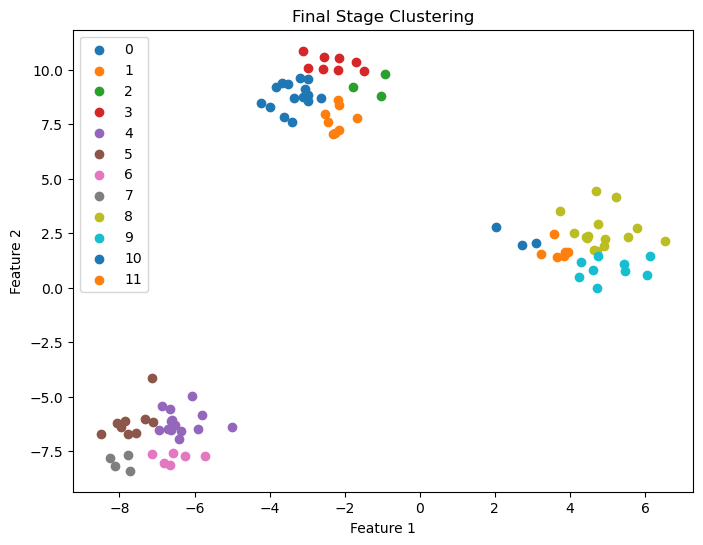

In [82]:
# Sample data
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, centers=3, random_state=42)

pipeline = NestedClustering([
    KMeans(n_clusters=3, random_state=42),  # First clustering stage
    AgglomerativeClustering(n_clusters=2),
    CustomClustering(n_clusters=2)
])

# Fit the pipeline
pipeline.fit(X)

# Plot the final clusters
plot_clusters(X, pipeline.final_labels, title="Final Stage Clustering")

## Now with real data

In [89]:
basePath = "/home/jaumeasensio/Documents/Projectes/BEEGroup/solar_potencial_estimation_v3/"
neighborhood = "Test_70_el Besòs i el Maresme"
parcelsFolder = basePath + "/Results/" + neighborhood + "/Parcels/"

folders = os.listdir(parcelsFolder)

for i in range(len(folders[0:1])):
    subfolder = parcelsFolder + "/" + folders[i] + "/"
    fullDF = []
    for construction in [x for x in os.listdir(subfolder)[0:1] if os.path.isdir(subfolder + x)]:
        lazFile = subfolder + construction + "/Map files/" + construction + ".laz"
      
        lasDF = laspy.read(lazFile)
        data = lasDF.xyz

print(data)

[[4.34148948e+05 4.58489356e+06 6.14800000e+00]
 [4.34148572e+05 4.58489351e+06 5.09800000e+00]
 [4.34148495e+05 4.58489309e+06 4.77000000e+00]
 ...
 [4.34077874e+05 4.58485233e+06 4.70700000e+00]
 [4.34077414e+05 4.58485212e+06 4.79800000e+00]
 [4.34076704e+05 4.58485152e+06 5.63400000e+00]]


In [ ]:
class heightSplit(BaseEstimator, ClusterMixin): # Step 1: Create a template for custom clustering algorithms
    def __init__(self):
        pass

    def fit(self, X):
        return self

    def predict(self, X):
        pass

    def fit_predict(self, X, y=None):
        self.fit(X)
        return self.labels_

In [ ]:
class kPlanes(BaseEstimator, ClusterMixin): # Step 1: Create a template for custom clustering algorithms
    def __init__(self):
        pass

    def fit(self, X):
        return self

    def predict(self, X):
        pass

    def fit_predict(self, X, y=None):
        self.fit(X)
        return self.labels_

In [ ]:
class removeAnomalies(BaseEstimator, ClusterMixin): # Step 1: Create a template for custom clustering algorithms
    def __init__(self):
        pass

    def fit(self, X):
        return self

    def predict(self, X):
        pass

    def fit_predict(self, X, y=None):
        self.fit(X)
        return self.labels_

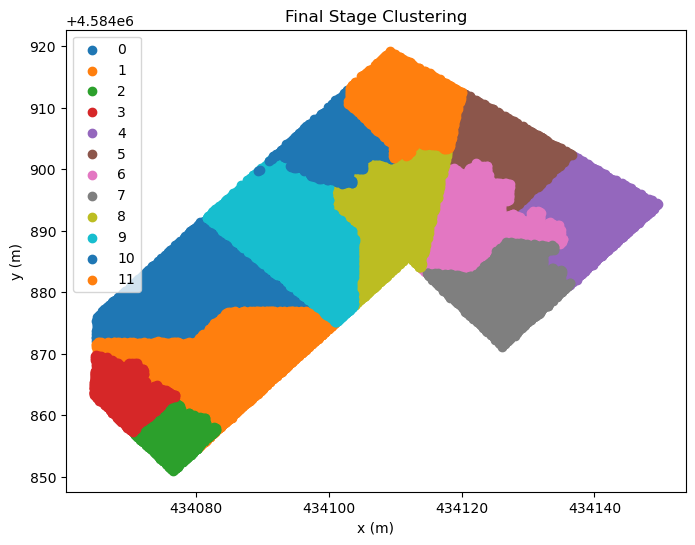

In [93]:
from sklearn.cluster import DBSCAN

pipeline = NestedClustering([
    heightSplit(),  # First clustering stage
    DBSCAN(eps=0.15, min_samples=8),
    kPlanes(),
    removeAnomalies(),
])

# Fit the pipeline
pipeline.fit(data)

# Plot the final clusters
plot_clusters(data, pipeline.final_labels, title="Final Stage Clustering")